# Words Hashing Experiment

Below are the results of plotting the average of the max number of elements in a hack bucket/bin as the number of buckets scales with the number of objects in the hash table

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from hashtable import *
from strwrapper import *

np.random.seed(0)
fin = open("words.txt")
words = [StrWrapper(w) for w in fin.readlines()]
words = [words[i] for i in np.random.permutation(len(words))]
fin.close()

nums = []
avgs = []
maxes = []
nempty = []

In [2]:
for i in range(0, 200000, 10):
    nums.append(i)
    dictionary = HashTable(i+1)
    for w in words[0:i+1]:
        dictionary.add(w)
    lens = [dictionary.bin_len(k) for k in range(i+1)]
    maxi = np.max(lens)
    avgi = np.mean(lens)
    avgs.append(avgi)
    maxes.append(maxi)
    nempty.append(np.sum(np.array(lens) == 0))
    if i%10000 == 0:
        print(i, ".", end="")

0 .10000 .20000 .30000 .40000 .50000 .60000 .70000 .80000 .90000 .100000 .110000 .120000 .130000 .140000 .150000 .160000 .170000 .180000 .190000 .

In [17]:
import scipy.io as sio
sio.savemat("hashexperiment.mat", {"nums":nums, "avgs":avgs, "maxes":maxes, "nempty":nempty})

y.size =  20000


/tmp/ipykernel_56980/2181586761.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, 3*np.log(x)/np.log(np.log(x)), linewidth=4, linestyle='--')
/tmp/ipykernel_56980/2181586761.py:11: RuntimeWarning: invalid value encountered in log
  plt.plot(x, 3*np.log(x)/np.log(np.log(x)), linewidth=4, linestyle='--')


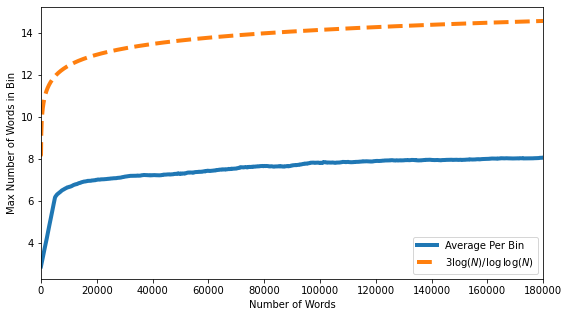

In [14]:
nums = np.array(nums)
y = medfilt(maxes, 5) # Median filter
win = 1000
print("y.size = ", y.size)
y = np.convolve(y, np.ones(win), 'same')/win # Running average
N1 = 100
N2 = min(len(maxes), len(nums))-win
x = range(0, 200000, 10)
plt.figure(figsize=(9, 5))
plt.plot(x, y, linewidth=4)
plt.plot(x, 3*np.log(x)/np.log(np.log(x)), linewidth=4, linestyle='--')
plt.xlim([0, 180000])
plt.xlabel("Number of Words")
plt.ylabel("Max Number of Words in Bin")
plt.legend(["Average Per Bin", "$3 \\log(N) / \\log\\log(N)$"])

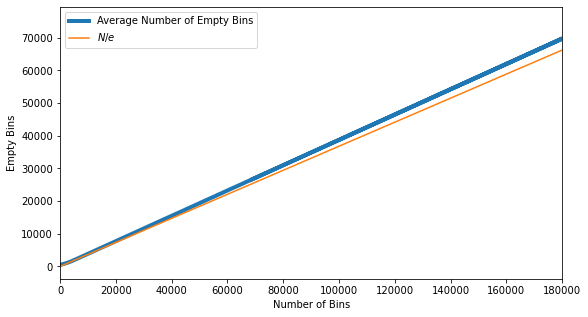

In [16]:
y = np.convolve(nempty, np.ones(win), 'same')/win
plt.figure(figsize=(9, 5))
plt.plot(x, y, linewidth=4)
plt.plot(x, x/np.exp(1))
plt.xlabel("Number of Bins")
plt.ylabel("Empty Bins")
plt.xlim([0, 180000])
plt.legend(["Average Number of Empty Bins", "$N/e$"])